In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import re

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import nltk
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk import pos_tag

# Loading DataSet And Create New DataFrame

In [2]:
df = pd.read_csv('tmdb_5000_movies.csv')

# Create an empty DataFrame
movies = pd.DataFrame()

df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [3]:
df.iloc[0]

budget                                                          237000000
genres                  [{"id": 28, "name": "Action"}, {"id": 12, "nam...
homepage                                      http://www.avatarmovie.com/
id                                                                  19995
keywords                [{"id": 1463, "name": "culture clash"}, {"id":...
original_language                                                      en
original_title                                                     Avatar
overview                In the 22nd century, a paraplegic Marine is di...
popularity                                                     150.437577
production_companies    [{"name": "Ingenious Film Partners", "id": 289...
production_countries    [{"iso_3166_1": "US", "name": "United States o...
release_date                                                   2009-12-10
revenue                                                        2787965087
runtime                               

# Checking If There Is Any Difference in Title and Original Title

In [4]:
df[df['title'] != df['original_title']]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
97,15000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",NaN,315011,"[{""id"": 1299, ""name"": ""monster""}, {""id"": 7671,...",ja,シン・ゴジラ,From the mind behind Evangelion comes a hit la...,9.476999,"[{""name"": ""Cine Bazar"", ""id"": 5896}, {""name"": ...","[{""iso_3166_1"": ""JP"", ""name"": ""Japan""}]",2016-07-29,77000000,120.0,"[{""iso_639_1"": ""it"", ""name"": ""Italiano""}, {""is...",Released,A god incarnate. A city doomed.,Shin Godzilla,6.5,143
215,130000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",NaN,1979,"[{""id"": 657, ""name"": ""fire""}, {""id"": 720, ""nam...",en,4: Rise of the Silver Surfer,The Fantastic Four return to the big screen as...,60.810723,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""DE"", ""name"": ""Germany""}, {""is...",2007-06-13,289047763,92.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Discover the secret of the Surfer.,Fantastic 4: Rise of the Silver Surfer,5.4,2589
235,97250400,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 12, ""na...",http://www.asterixauxjeuxolympiques.com/index.php,2395,"[{""id"": 271, ""name"": ""competition""}, {""id"": 12...",fr,Astérix aux Jeux Olympiques,Astérix and Obélix have to win the Olympic Gam...,20.344364,"[{""name"": ""Constantin Film"", ""id"": 47}, {""name...","[{""iso_3166_1"": ""BE"", ""name"": ""Belgium""}, {""is...",2008-01-13,132900000,116.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,NaN,Asterix at the Olympic Games,5.0,471
317,94000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 36, ""name...",http://www.theflowersofwarmovie.com/,76758,"[{""id"": 173251, ""name"": ""forced prostitution""}...",zh,金陵十三釵,A Westerner finds refuge with a group of women...,12.516546,"[{""name"": ""Beijing New Picture Film Co. Ltd."",...","[{""iso_3166_1"": ""CN"", ""name"": ""China""}, {""iso_...",2011-12-15,95311434,145.0,"[{""iso_639_1"": ""zh"", ""name"": ""\u666e\u901a\u8b...",Released,NaN,The Flowers of War,7.1,187
474,0,"[{""id"": 9648, ""name"": ""Mystery""}, {""id"": 18, ""...",NaN,330770,"[{""id"": 428, ""name"": ""nurse""}, {""id"": 658, ""na...",fr,Évolution,11-year-old Nicolas lives with his mother in a...,3.300061,"[{""name"": ""Ex Nihilo"", ""id"": 3307}, {""name"": ""...","[{""iso_3166_1"": ""BE"", ""name"": ""Belgium""}, {""is...",2015-09-14,0,81.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""}]",Released,NaN,Evolution,6.4,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4699,0,"[{""id"": 18, ""name"": ""Drama""}]",NaN,344466,[],ro,Lumea e a mea,Larisa is 16 and lives in a city by the sea. I...,0.327622,[],"[{""iso_3166_1"": ""RO"", ""name"": ""Romania""}]",2015-06-05,0,104.0,"[{""iso_639_1"": ""ro"", ""name"": ""Rom\u00e2n\u0103""}]",Released,NaN,The World Is Mine,0.0,0
4719,120000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",NaN,40652,"[{""id"": 1965, ""name"": ""sandstorm""}, {""id"": 151...",fr,Une femme mariée: Suite de fragments d'un film...,"Charlotte is young and modern, not a hair out ...",1.112792,"[{""name"": ""Orsay Films"", ""id"": 2325}, {""name"":...","[{""iso_3166_1"": ""FR"", ""name"": ""France""}]",1964-12-04,0,95.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""}]",Released,She Loves Two Men... She is Married to One!,The Married Woman,7.1,20
4751,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",NaN,42109,[],pt,"Gabriela, Cravo e Canela","In 1925, Gabriela becomes cook, mistress, and ...",0.557602,"[{""name"": ""United Artists"", ""id"": 60}, {""name""...","[{""iso_3166_1"": ""BR"", ""name"": ""Brazil""}]",1983-03-24,0,99.0,"[{""iso_639_1"": ""pt"", ""name"": ""Portugu\u00eas""}]",Released,NaN,Gabriela,6.0,2
4790,0,"[{"

# Checking If There Is Any UnReleased Movies And Removing Them From DataSet

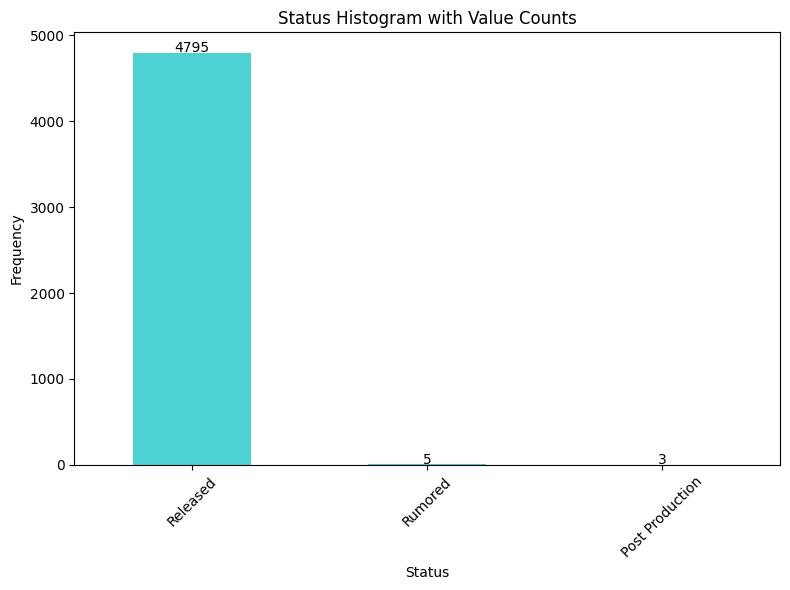

In [5]:
# Create a histogram of 'status' column with value counts displayed on bars
plt.figure(figsize=(8, 6))
status_counts = df['status'].value_counts()
status_counts.plot(kind='bar', color='c', alpha=0.7)

# Display value counts on top of the bars
for i, count in enumerate(status_counts):
    plt.text(i, count + 10, str(count), ha='center', fontsize=10)

plt.xlabel('Status')
plt.ylabel('Frequency')
plt.title('Status Histogram with Value Counts')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the histogram
plt.show()

In [6]:
# Find indices of rows with status 'Rumored' or 'Post Production'
indices_to_remove = df[(df['status'] == 'Rumored') | (df['status'] == 'Post Production')].index

# Remove the identified rows from the DataFrame
df = df.drop(indices_to_remove)

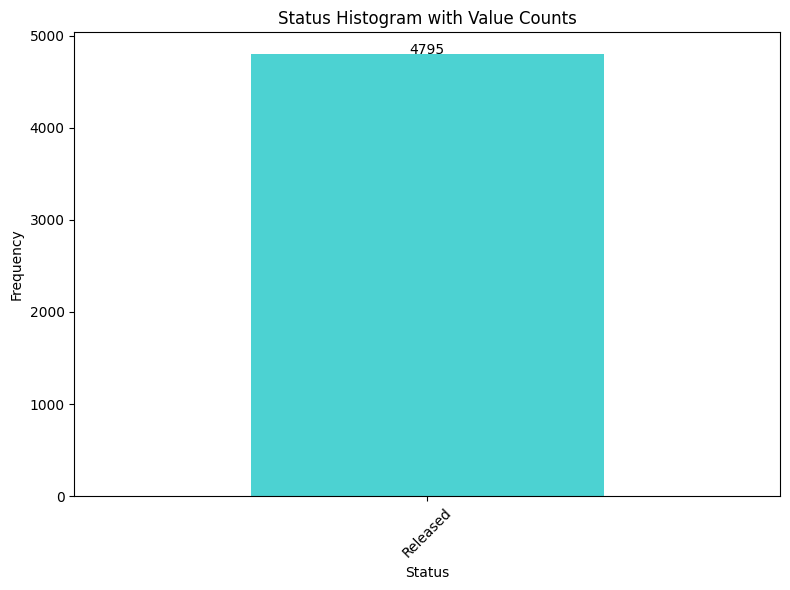

In [7]:
# Create a histogram of 'status' column with value counts displayed on bars
plt.figure(figsize=(8, 6))
status_counts = df['status'].value_counts()
status_counts.plot(kind='bar', color='c', alpha=0.7)

# Display value counts on top of the bars
for i, count in enumerate(status_counts):
    plt.text(i, count + 10, str(count), ha='center', fontsize=10)

plt.xlabel('Status')
plt.ylabel('Frequency')
plt.title('Status Histogram with Value Counts')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the histogram
plt.show()

# Extract Important Features To New DataFrame

In [8]:
movies['title'] = df['title']

# Define a function to extract attributes from JSON
def extract_attributes(attr_str):
    attributes = json.loads(attr_str)
    attribute_names = [attr["name"] for attr in attributes]
    return ", ".join(attribute_names)

# Apply the function to the 'genres' column and create a new column 'genres'
movies['genres'] = df['genres'].apply(extract_attributes)

# Apply the function to the 'keywords' column and create a new column 'extracted_keywords'
movies['keywords'] = df['keywords'].apply(extract_attributes)

# movies['original_language'] = df['original_language']

# movies['overview'] = df['overview']

# movies['spoken_languages'] = df['spoken_languages'].apply(extract_attributes)

# movies['tagline'] = df['tagline']

In [9]:
movies

,title,genres,keywords
0,Avatar,"Action, Adventure, Fantasy, Science Fiction","culture clash, future, space war, space colony..."
1,Pirates of the Caribbean: At World's End,"Adventure, Fantasy, Action","ocean, drug abuse, exotic island, east india t..."
2,Spectre,"Action, Adventure, Crime","spy, based on novel, secret agent, sequel, mi6..."
3,The Dark Knight Rises,"Action, Crime, Drama, Thriller","dc comics, crime fighter, terrorist, secret id..."
4,John Carter,"Action, Adventure, Science Fiction","based on novel, mars, medallion, space travel,..."
...,...,...,...
4798,El Mariachi,"Action, Crime, Thriller","united states–mexico barrier, legs, arms, pape..."
4799,Newlyweds,"Comedy, Romance",
4800,"Signed, Sealed, Delivered","Comedy, Drama, Romance, TV Movie","date, love at first sight, narration, investig..."
4801,Shanghai Calling,,


# Checking If There Is Any Null Value

In [10]:
# Check for null values in the DataFrame
movies.isnull().sum()

title       0
genres      0
keywords    0
dtype: int64

# Downloading NLTK Datasets

In [11]:
nltk.download('punkt')  # Download NLTK data for tokenization if not already downloaded
nltk.download('stopwords')  # Download NLTK data for stopwords if not already downloaded
nltk.download('wordnet')  # Download NLTK data for WordNet if not already downloaded
nltk.download('averaged_perceptron_tagger')  # Download NLTK data for POS tagger if not already downloaded

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Saeed\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Saeed\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Saeed\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Saeed\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

# PreProcess The Data and Removing Stop Words And NonAlphabetic Chars Using Lemmatization and Pos Technic

In [12]:
def text_preprocessor(data):
    # Load English stopwords
    stop_words = set(stopwords.words('english'))
    
    # Initialize the SnowballStemmer with English language
    # stemmer = SnowballStemmer("english")
    
    # Initialize the WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    
    # Mapping between Penn Treebank POS tags and WordNet POS tags
    def penn_to_wordnet_pos(tag):
        if tag.startswith('N'):
            return wordnet.NOUN
        elif tag.startswith('V'):
            return wordnet.VERB
        elif tag.startswith('J'):
            return wordnet.ADJ
        elif tag.startswith('R'):
            return wordnet.ADV
        else:
            return wordnet.NOUN  # Default to noun
    
    # Tokenize and preprocess the text data
    def preprocess_text(text):
        tokens = word_tokenize(text)  # Tokenize the text
        tokens = [token.lower() for token in tokens if token.isalpha()]  # Keep only alphabetic tokens
        tokens = [token for token in tokens if token not in stop_words]  # Remove stopwords
        pos_tags = pos_tag(tokens)  # Get part of speech tags
        # stemmed_tokens = [stemmer.stem(token) for token in tokens]  # Apply Snowball stemmer
        # lemmatized_tokens = [lemmatizer.lemmatize(token) for token, pos in pos_tags]  # Apply lemmatization without POS
        lemmatized_tokens = [lemmatizer.lemmatize(token, pos=penn_to_wordnet_pos(pos)) for token, pos in pos_tags]  # Apply lemmatization with POS
        return " ".join(lemmatized_tokens)  # Join the tokens back into a string
    
    return data[:].apply(preprocess_text)

# Converting a multi-part word into a single part in order to keep their meaning together and to be able to use them better to make suggestions

In [13]:
# Function to remove spaces between words in a cell
def remove_spaces(cell):
    return ', '.join(word.replace(' ', '') for word in cell.split(', '))

# Apply the function only to the genres and keywords columns
movies['genres'] = movies['genres'].apply(remove_spaces) 
movies['keywords'] = movies['keywords'].apply(remove_spaces)

# Converting the contents of all columns to a single String And PreProcess Them

In [14]:
# Convert all columns except title column to strings and then add them together with a comma separator
movies['all_columns_values'] = movies.drop(columns=['title']).astype(str).apply(lambda row: ', '.join(row), axis=1)

preprocessed_text = text_preprocessor(movies['all_columns_values'])

In [15]:
preprocessed_text

0       action adventure fantasy sciencefiction cultur...
1       adventure fantasy action ocean drugabuse exoti...
2       action adventure crime spy basedonnovel secret...
3       action crime drama thriller dccomics crimefigh...
4       action adventure sciencefiction basedonnovel m...
                              ...                        
4798    action crime thriller leg arm paperknife guita...
4799                                       comedy romance
4800    comedy drama romance tvmovie date loveatfirsts...
4801                                                     
4802      documentary obsession camcorder crush dreamgirl
Name: all_columns_values, Length: 4795, dtype: object

# Counting Words Using TF-IDF Vectorizer Methode And Build Recommender Function Using Cosine_Similarity

In [16]:
# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the "book_name" column
tfidf_matrix = tfidf_vectorizer.fit_transform(preprocessed_text)

# Calculate cosine similarity for all document pairs
cosine_sim = cosine_similarity(tfidf_matrix)

def recommender(movie_name):
    # Find the index of the "Avatar" movie
    movie_index = movies[movies['title'] == movie_name].index[0]
    
    # Find the indices of the 5 most similar documents to the query vector
    most_similar_indices = np.argsort(cosine_sim[movie_index])[-6:-1][::-1]
    
    # Get the most similar documents
    return movies['title'].iloc[most_similar_indices]

In [17]:
movie_to_recommend = 'Scream 3'

most_similar_Movies = recommender(movie_to_recommend)

print(f"Most Similar Movies to {movie_to_recommend}: ")
most_similar_Movies

Most Similar Movies to Scream 3: 


4628                          Graduation Day
4053        Friday the 13th: A New Beginning
4048                             The Calling
3902    Friday the 13th Part VI: Jason Lives
2637                       Felicia's Journey
Name: title, dtype: object

# Plotting Similarity Scores

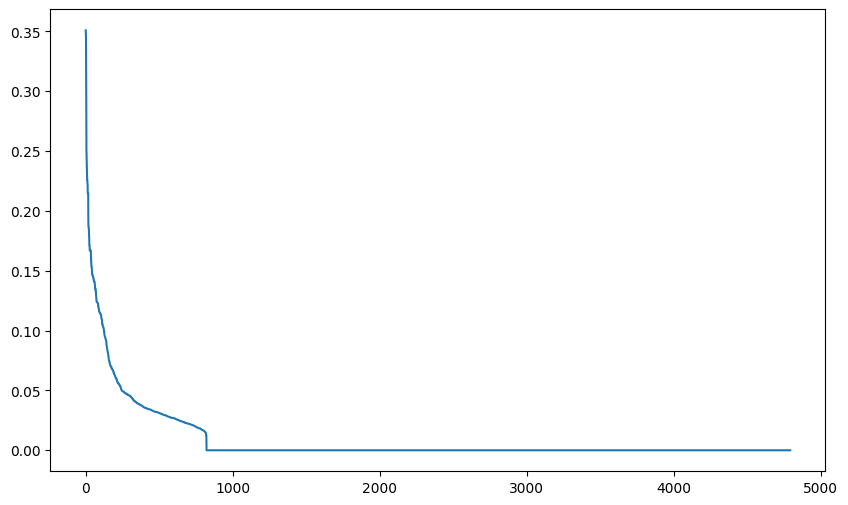

In [18]:
def plot_similarity_scores(movie_name):
    # Find the index of the movie
    movie_index = movies[movies['title'] == movie_name].index[0]
    
    # Get the similarity scores for the searched movie
    similarity_scores = cosine_sim[movie_index]
    # Remove the similarity score for the searched movie itself
    similarity_scores = np.delete(similarity_scores, movie_index)
    
    
    # Plot the similarity scores
    plt.figure(figsize=(10, 6))
    plt.plot(similarity_scores[(-similarity_scores).argsort()])
    plt.show()

# Call the plot_similarity_matrix function with the movie name you want to search for
plot_similarity_scores("Scream 3")